<a href="https://colab.research.google.com/github/Lekkice/ADA-Informes/blob/main/Informe6_Select.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Problema de selección

Entrada: Arreglo de *n* números y un indice *i*.

Salida: Elemento del arreglo que es mayor a *i - 1* de los elementos contenidos.

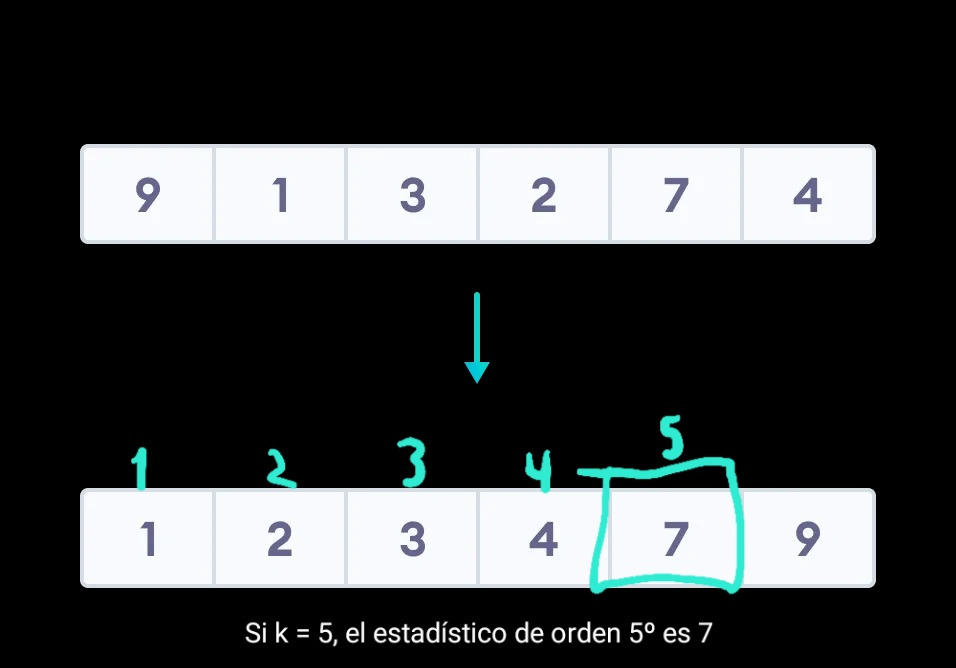


Generalmente, la selección se utiliza como subproblema para resolver problemas más complejos, como por ejemplo el problema de encontrar el camino más corto. Muchos de los algoritmos de selección podrían ser considerados como generalizaciones de algoritmos de ordenamiento, y por otro lado, algunos algoritmos de ordenamiento podrían ser considerados como repeticiones de selección.

# 2. Selection

# 2.1 Descripción del algoritmo
El algoritmo utiliza la función PivotSelection para elegir un pivote. Luego, usa Partition para dividir el arreglo en 2 y compara el indice de entrada *i* con la posición del pivote. Finalmente, si la posición es igual a *i*, se retorna el pivote, y si es diferente, se aplica recursión.
1. Se elige un pivote con PivotSelection.
2. Se divide el arreglo en 2 utilizando el pivote, con Partition.
3. Luego, ocurre uno de los siguientes tres casos:
- Si la posición del pivote es igual a *i*, se retorna el elemento pivote.
- Si es menor a *i*, se llama Select recursivamente en la mitad izquierda.
- Si es mayor a *i*, se llama Select recursivamente en la mitad derecha.

# 2.2 Código

In [2]:
#@title Código Quicksort { display-mode: "form" }
import random

#https://www.geeksforgeeks.org/quick-sort/
def partition(array, low, high, comparaciones = [0], pivoteNuevo = None):
    if pivoteNuevo != None: array[pivoteNuevo], array[high] = array[high], array[pivoteNuevo]
    pivot = array[high]
    i = low - 1
 
    for j in range(low, high):
        comparaciones[0] += 1
        if array[j] <= pivot:
            i = i + 1
            (array[i], array[j]) = (array[j], array[i])
 
    (array[i + 1], array[high]) = (array[high], array[i + 1])
 
    return i + 1

def quickSort(array, low, high, comparaciones = [0]):
    if low < high:
        pi = partition(array, low, high)
        quickSort(array, low, pi - 1)
        quickSort(array, pi + 1, high)
    
    return comparaciones

In [3]:
def pivotSelection(arreglo, verbose, comparaciones):
    if len(arreglo) == 1: return arreglo[0]
    div = []
    count = 0
    idx = 0
    for idxOriginal, elemento in enumerate(arreglo):
        comparaciones[0] += 1
        if idx + 1 > len(div):
            div.append([])
        if type(elemento) is not tuple: div[idx].append( (elemento, idxOriginal) )
        else: div[idx].append(elemento)

        count += 1
        if count == 5:
            idx += 1
            count = 0
    medianas = []
    for subarreglo in div:
        quickSort(subarreglo, 0, len(subarreglo) - 1, comparaciones)
        medianas.append(subarreglo[int(len(subarreglo)/2)])
    if len(medianas) == 1: return medianas[0]
    return pivotSelection(medianas, verbose, comparaciones)

def select(arreglo, k, verbose = False, comparaciones = [0]):
    if verbose: print(f"se llama select() con k = {k}, arreglo = {arreglo}")

    if len(arreglo) == 1:
        if verbose: print(f"el arreglo sólo tiene un elemento, el estadístico de orden es {arreglo[0]}")
        return arreglo[0]

    pivote = pivotSelection(arreglo, verbose, comparaciones)[1]
    pivote = partition(arreglo, 0, len(arreglo) - 1, comparaciones, pivote)
    if verbose: print(f"después de partition: {arreglo} con pivote {pivote}")

    
    if len(arreglo) == 2: 
        if verbose: print(f"el arreglo sólo tiene 2 elementos, el estadístico de orden es {arreglo[k]}")
        return arreglo[k]

    if k == pivote:
        if verbose: print(f"k es igual al pivote, el estadístico de orden es {arreglo[pivote]}")
        return arreglo[pivote]
    if k < pivote:
        if verbose: print(f"k es menor que el pivote"); print()
        return select(arreglo[:pivote], k, verbose, comparaciones)
    if k > pivote:
        if verbose: print(f"k es mayor que el pivote"); print()
        return select(arreglo[pivote+1:], k - pivote - 1, verbose, comparaciones)

# 2.3 Ejemplo

Consideremos el arreglo [6, 3, 4, 5, 9] y *k = 1* como ejemplo.
Primero, se encuentra un pivote óptimo con pivotSelection(). Se divide en n/5 subarreglos, pero en este caso, se mantiene el arreglo original con los 5 elementos y se retorna su mediana (5). Luego, se llama partition() utilizando el pivote obtenido (5) y se compara *k* y *pivote*.

*k* es menor a *pivote* (1 < 2), por lo tanto, se sigue buscando el estadístico de orden por el subarreglo de la izquierda [3, 4]. Se llama partition una vez más para ordenar los 2 únicos elementos, y luego se retorna el elemento en la posición *k*. El elemento retornado es el estadístico de orden 2°.

# 2.4 Ejecución paso a paso

In [4]:
arreglo = [6, 3, 4, 5, 9] #[3, 7, 8, 1, 4, 6, 9, 5]
select(arreglo, 1, True)
print()

se llama select() con k = 1, arreglo = [6, 3, 4, 5, 9]
después de partition: [3, 4, 5, 9, 6] con pivote 2
k es menor que el pivote

se llama select() con k = 1, arreglo = [3, 4]
después de partition: [3, 4] con pivote 1
el arreglo sólo tiene 2 elementos, el estadístico de orden es 4



#3. Tiempo de Ejecucción

Para calcular el tiempo de ejecución se deben tener en cuenta el tiempo de ejecucción de cada función, el pivot Select nos da $T(n) = n/5$ debido a que divide en subarreglos. El $insertion sort$ en caso promedio tiene complejidad de $O(n^2)$, pero como es un tamaño constante en este caso podria tomarse como $O(1)$. La función partition debiese ser un $O(n)$ puesto que recorre hasta n-1 comparando los datos. Y por último la función $Pivot Select$ como divide y calcula la mediana de los datos que es mayor a $3n/10 +6$, por lo que es una complejidad de O(n).

Como podemos ver, gracias al metodo de mediana de medianas (pivot select) la complejidad del algoritmo es $O(n)$, este metodo surgio de la idea de reducir el tiempo de ejecucción que tenia el algoritmo que solamente utilizaba el partition, el cual tenia una complejidad de $O(nlogn)$.

# 4. Correctitud de Select

Nuestra hipótesis P(n) es que la función *Select* recibe un arreglo y un indice *k* que corresponde al estadístico de orden k°, y retorna el valor del estadístico.

En el caso base, cuando *n = 1*, el estadístico de orden es el único elemento contenido en el arreglo. Por lo tanto, se cumple la hipótesis.

Para el paso inductivo, probaremos P(m). Si *n > 1*, entonces se busca un pivote óptimo y se divide el arreglo con Partition. Luego de la división, si la posición del pivote es diferente de *k*, se llama recursivamente Select utilizando una de las dos mitades. El nuevo largo del arreglo es, en el peor caso, *7n/10*. Como *m < n*, el largo va a converger en 1 eventualmente si no se cumple que *pivote = k* antes. Por lo tanto, el algoritmo es correcto.

#5. Experimentos

Ahora realizaremos un número de experimentos que nos ayudaran a visualizar la eficacia del **select** en ciertos aspectos.

##5.1. Numero de comparaciones

En este experimento se comprobara el numero de comparaciones que el algoritmo **select** necesita realizar para poder encontrar el I=esimo elemento de una lista.

Para ello se hizo una grafica en la que se muestra.

* La cantidad de comparaciones del peor caso calculadas matemáticamente,
* La cantidad de comparaciones del mejor caso calculadas matemáticamente (n-1 comparaciones si el arreglo está ordenado)
* La cantidad de comparaciones realizadas experimentalmente para entradas aleatorias

para un problema que tiene un tamaño $n \in [5,100]$

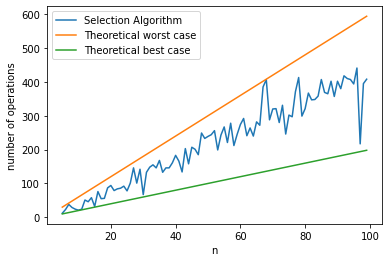

In [111]:
import matplotlib.pyplot as plt
import random

x=[n for n in range(5,100)] 
y1=[6*n for n in range(5,100)] # worst case
y2=[2*n for n in range(5,100)] # best case
y=[];

for n in range(5,100):
  a = random.sample(range(1, 200), n)
  i_esimo = random.sample(range(n), 1)[0]
  counter = [0]
  a = select(a, i_esimo, False, counter)
  y.append(counter[0])

plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["Selection Algorithm", "Theoretical worst case", "Theoretical best case"])

plt.xlabel('n')
plt.ylabel('number of operations')
plt.show()

## Análisis

Se observa que la complejidad temporal de Selection es $\theta(n)$. Su número de comparaciones se encuentra entre 2 funciones $c$<sub>1</sub>$ * g(x)$ y $c$<sub>2</sub>$ * g(x)$, con $g(x) = x$.

##5.2. Comparación entre algoritmos

En este experimento se compararán dos algoritmos de búsqueda, el **Select** y el **Randomized select**. En específico, se comparará el número de comparaciones que realizan ambos algoritmos.

Como el nombre sugiere, el **Randomized select** funciona de la misma manera que el select, pero en este caso el pivote no estará dado por la mediana, si no que sera un pivote aleatorio en el arreglo.

Para ello se hizo una gráfica en la que se muestra:

* La cantidad de comparaciones que el **Select** realiza (la gráfica azul)
* La cantidad de comparaciones que el **Randomized select** realiza (la gráfica naranja)

para un problema que tiene un tamaño $n \in [5,100]$

In [115]:
#@title Código r_select { display-mode: "form" }
def r_select(arreglo, k, comparaciones = [0]):
    if len(arreglo) == 1: return arreglo[0]

    pivote = random.randint(0, len(arreglo) - 1)
    pivote = partition(arreglo, 0, len(arreglo) - 1, comparaciones, pivote)
    
    if len(arreglo) == 2: return arreglo[k % 1]

    #print(f"k = {k}, pivote = {pivote}, arreglo = {arreglo}")
    if k == pivote: return arreglo[pivote]
    if k < pivote: return r_select(arreglo[:pivote], k, comparaciones)
    if k > pivote: return r_select(arreglo[pivote+1:], k - pivote - 1, comparaciones)

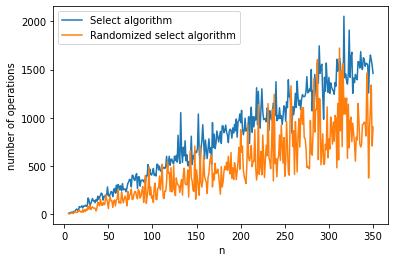

In [113]:
import matplotlib.pyplot as plt

x=[n for n in range(5, 351)] 
y1=[]; y2=[]

for n in range(5, 351):
  a = random.sample(range(1, 400), n)
  i_esimo = random.randint(0,n-1)

  counter = [0]
  select(a, i_esimo, False, counter)
  y1.append(counter)

  counter = [0]
  r_select(a, i_esimo, counter)
  y2.append(counter)

plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["Select algorithm","Randomized select algorithm"])

plt.xlabel('n')
plt.ylabel('number of operations')
plt.show()

## Análisis

Se puede observar que la cantidad de comparaciones es generalmente mayor en el algoritmo Select. Esto podría ser porque se realizan más operaciones para encontrar un pivote. Pero como ventaja de esto, su peor caso es mejor que el de r_Select y su rango es menor.